# Making a dataframe from a SQL query

SQL is a very powerful tool that can help us organize our data quite effectively. This tutorial demonstrates how to make a query, connect to a database, and do so safely. Each line will be broken down for you below.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

`sqlalchemy` is a very powerful library that lets us interact with SQL databases. It has many functions, however, the only function we need is for it to create the "engine". The engine is simply the connection apparatus for python to talk to the SQL database. `pandas` can use `sqlalchemy` engines to talk to databases. This makes it very easy to import data from a database into a dataframe.

In [2]:
import sqlalchemy

`urllib` is also a very powerful library. In this case we use it to parse the connection string so `sqlalchemy` can read it. The connection string provides the sqlalchemy engine all the information that is necessary for connecting to the database. This connection string is important and should be **kept a secret!** It will have your username and password and should never be uploaded to github. Make sure you add it to your `.gitignore` file.

In [3]:
import urllib

These are two python files that we have created ourselves.

**queries** - we put all our queries in a separate python file and then import them. This is because queries can end up being very long strings and sit at the front of notebooks taking up space. This can make notebooks hard to read.

**connections** - This file contains the connection string. We put the connection string in a separate file because it should **be kept secret**. Remember to add this file to your `.gitignore` file.

In [4]:
import queries
from connections import *

Here we parse the connection string and then give it to sqlalchemy to create the engine.

In [5]:
quoted = urllib.parse.quote_plus(CONN_STR)
engine = sqlalchemy.create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

Like reading in CSV files, pandas easily reads in a query value. The pandas `read_sql` function simply turns the output of the query into a dataframe.

In [6]:
df = pd.read_sql(queries.STUDENTS, engine)

And now thorough the magic of computers we have pulled some data from a database, stuck it in a `pandas` dataframe, and made a visualization below. Check out the chaining of functions that `pandas` dataframe allows. It probably looks complicated now but eventually you might find these sorts of chains of functions easy to write when you are exploring your data.

In [7]:
df.head()

,student_id_fk,birth_date,gender,Ipeds_flag,ethnicity,first_course_datetime,hsgpa,hsgpa_type_code,math_placement_score,HS_Zip_Code,HS_State_Code,math_act,natsci_act,first_gen
0,A02145826,1959-08-08,F,1,Caucasian (non Hispanic),1992-06-24,NaN,None,NaN,None,None,NaN,NaN,0
1,A02145834,1966-11-01,M,1,Caucasian (non Hispanic),1992-06-24,NaN,None,NaN,None,None,NaN,NaN,0
2,A02145843,1965-05-05,M,1,Caucasian (non Hispanic),1992-06-24,NaN,None,NaN,None,None,NaN,NaN,0
3,A02145851,1971-07-17,M,7,Other,1992-06-24,NaN,None,NaN,None,None,NaN,NaN,0
4,A02145865,1959-07-19,F,8,Not Reported,1992-06-24,NaN,None,NaN,None,None,NaN,NaN,0


Text(0, 0.5, 'high school gpa')

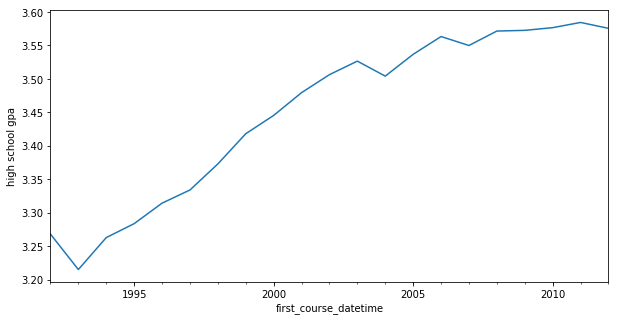

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
df.set_index('first_course_datetime').groupby(pd.Grouper(freq='y')).mean().hsgpa.plot(ax=ax)
ax.set_ylabel('high school gpa')